In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.rand()
👉 Ye NumPy ka function hai jo uniform distribution se random numbers deta hai.
Iska matlab:np.random.rand()∈[0,1)
Jo bhi number ye deta hai, wo 0 (inclusive) se 1 (exclusive) ke beech hota hai. baad me Ab range ho gayi [-0.5, +0.5)

In [7]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5

In [9]:
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

X ka shape (100, 1) hai → matlab 100 rows, 1 column.
X[:, 0] matlab: "sab rows ke first column ko select karo". X[:, 0]**2->Squaring ka matlab hota hai: har value ko positive bana dete hain aur ek non-linear transformation ho jata hai.
y = 3x². 0.05 * np.random.randn(100) . np.random.randn(100) matlab:
Multiplying by 0.05 ka matlab: noise ka size chhota karna.

Iska kaam: data me randomness add karna taaki real-world jaise noisy data create ho.
y = 3*X[:, 0]**2 + noise
𝑥𝑖	 = input data points
ϵi	​= random noise

Iska matlab: y ek quadratic relationship follow karta hai with small random noise.

Graphically:
Agar tum plot karo X[:, 0] vs y, to tumhe ek U-shape curve milega jo thoda scatter karega noise ki wajah se.

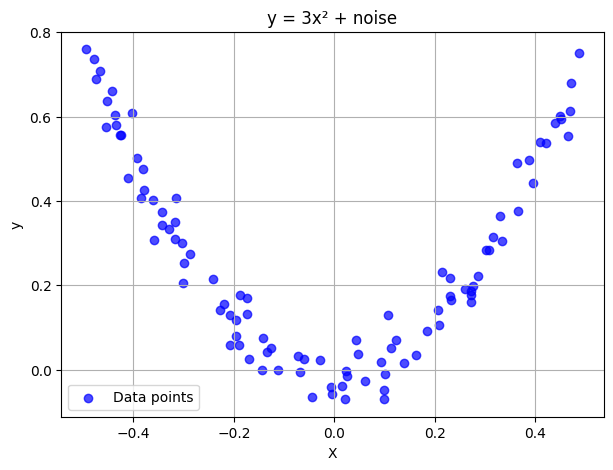

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3x² + noise')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import pandas as pd

In [20]:
df = pd.DataFrame()

In [22]:

df['X'] = X.reshape(100)
df['y'] = y

In [24]:

df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


In [26]:
df['pred1'] = df['y'].mean()
     

In [28]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [30]:
df['res1'] = df['y'] - df['pred1']

In [32]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


In [ ]:
Yani kuch values mean se upar hain (positive error), kuch neeche (negative error).
Residuals batate hain model kitna galat ya sahi hai. → Blue points dikhata hai actual data (X vs y).Red line dikhata hai mean prediction line (ek straight horizontal line)

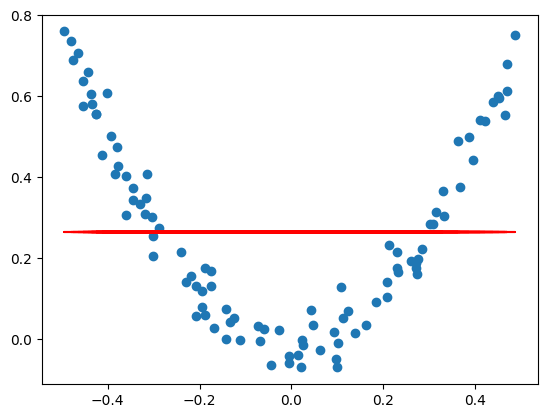

In [34]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')

Simple shabdon me:

Hume X aur y ke beech ka asli relationship samajhna hai.
Matlab: “X badalne par y kaise badalta hai?
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(100,1), df['res1'].values)


In [40]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [46]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [49]:
from sklearn.tree import plot_tree

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.29545454545454547, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.5227272727272727, 0.8333333333333333, '  False'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453

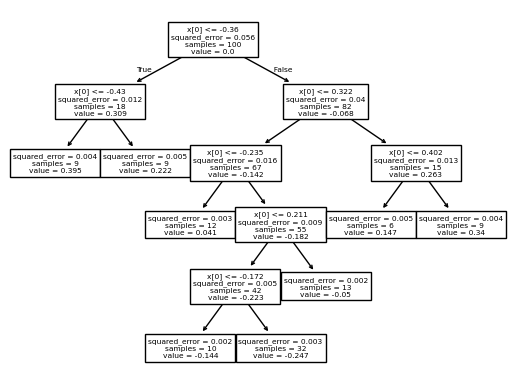

In [51]:
plot_tree(tree1)

In [53]:
X_test = np.linspace(-0.5, 0.5, 500)

💡 Scene: Tree to ban gaya, ab use test karna hai
plot_tree(tree1) tak humne model ko train kar liya aur visualize bhi kar liya.
🧠 par soch — sirf tree banana se kya hume pata chala ki model sahi kaam kar raha hai?

❌ Nahi.
Humne abhi tak kisi new X value ke liye y predict hi nahi kiya!

👉 Ye ek test data generate kar raha hai.

Breaking it down:
np.linspace(start, end, points)
→ -0.5 se 0.5 ke beech 500 equally spaced points generate karta hai.Tree actually ek piecewise constant function hota hai
(matlab: alag-alag intervals me ek fixed value deta hai).Matlab ab hum apne model ko ye 500 points deke poochhenge:
“tum yahan kya predict karte ho?”Aise karne se hum model ka curve bana sakte hain (smooth red line).

In [60]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))

Tree ko input 2D chahiye (500 rows × 1 column),isliye reshape(500, 1) karte hain.Phir uske saath add karte hain mean value (0.265458)
— kyunki tree residuals par trained tha (wo sirf correction sikha tha).

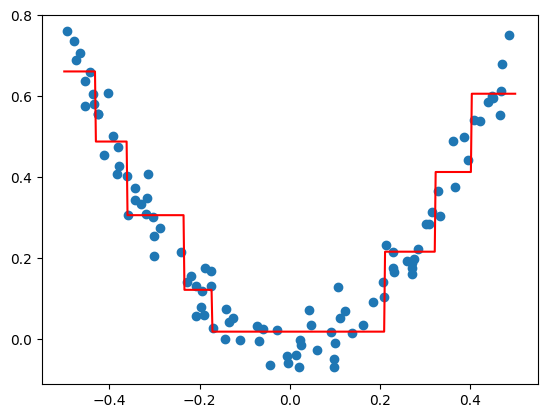

In [63]:
plt.plot(X_test, y_pred, color='red')
plt.scatter(df['X'], df['y'])

Blue dots → original data
Red line → tree model ka predicted shape
👉 Yahi step se hume pata chalta hai model ne kya seekha.

np.random.rand(100, 1) generates 100 random values between 0 and 1.Jab hum -0.5 subtract karte hain, to range become [-0.5, 0.5].

p.linspace(-0.5, 0.5, 500) creates 500 evenly spaced points between -0.5 and 0.5.
Ye same range hai jisme humne training data generate kiya tha.
Logic:Testing ke liye hum chahte hain continuous curve plot karein — taaki hum dekhein model ka prediction kaise behave karta hai pure range me, na ki sirf training points pe.

In [69]:

df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

Tree prediction deta hai residuals ka: predicted residual=tree1.predict(X)
Lekin hum chahte hain original target value y ko predict karein, isliye hum mean value add karte hain:
y-pred=mean(y)+predicted residual

In [72]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [74]:
df['res2'] = df['y'] - df['pred2']

In [76]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [78]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [80]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


res2 is actually residual after first tree’s prediction:
res2=y−(mean(y)+tree1.predict(X))

y pred=mean(y)+tree1(X)+tree2(X)
✅ Ye gradient boosting regression ka ek simplified version hai:
Har tree previous tree ke errors correct karta hai.
Final prediction = baseline + sum of all trees' corrections.

In [84]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

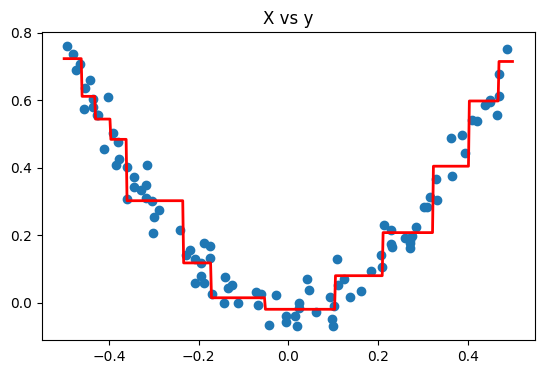

In [88]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [92]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

#→ Jab required number of trees train ho chuke ho (number == 0), recursion ruk jaata hai.
  if number == 0:
    return 
  else:
    # do gradient boosting
# Agar pehla tree nahi hai (count > 1),to hum residual update karte hain:
# new y=actual y−previous tree ka prediction
    if count > 1:
      y = y - regs[-1].predict(X)
#Agar pehla tree hai, to hum foo = y store kar lete hain for plotting (original y values).💡 Matlab har next tree previous tree ke error (residual) pe train hota hai — boosting ka core logic.
    else:
      foo = y
#Naya tree create hota hai aur current residuals pe train hota hai.Depth = 5 means ek small weak learner (not overfitted).
    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)
#Ye tree list me store hota hai taaki final model me sabka sum le saken.
    regs.append(tree_reg)
#x1: smooth range for plotting (-0.5 to 0.5, same as training X range).
#Har tree se prediction lo aur sabko learning rate (lr) se multiply karke sum lo:
#𝑦pred=∑(lr×treei(X)) Ye final boosted prediction hai ab tak ke sab trees ka.
    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

#Har iteration pe ek plot banta hai jisme: Blue line = model ka current fit (after adding this tree)
#Red dots = original data points
    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo) 


# Ab next tree train karne ke liye same function dobara call hota hai.
# number-1 => ek tree kam bacha train karne ke liye.
# count+1 => next step number.
# regs => ab tak ke sab trees ka list.
# foo => original y for plotting.

| Parameter | Meaning                                             |
| --------- | --------------------------------------------------- |
| `X`       | input features (2D array)                           |
| `y`       | target values (initially actual y, later residuals) |
| `number`  | kitne trees (iterations) lagane hain                |
| `lr`      | learning rate — har tree ka contribution kitna ho   |
| `count`   | recursion step (kitna tree bana chuke ho)           |
| `regs`    | list of trained trees (weak learners)               |
| `foo`     | original `y` (used only for plotting)               |


3


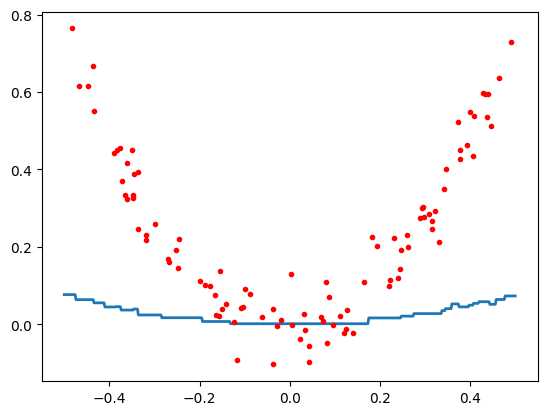

2


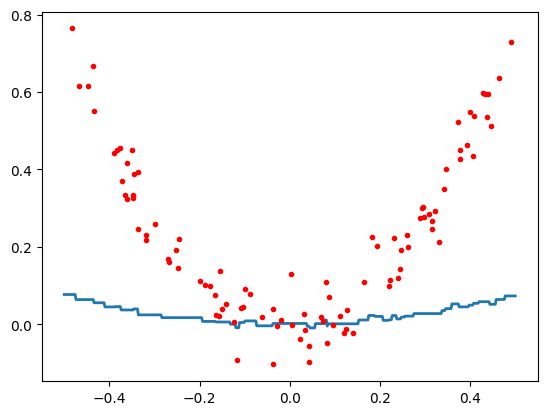

1


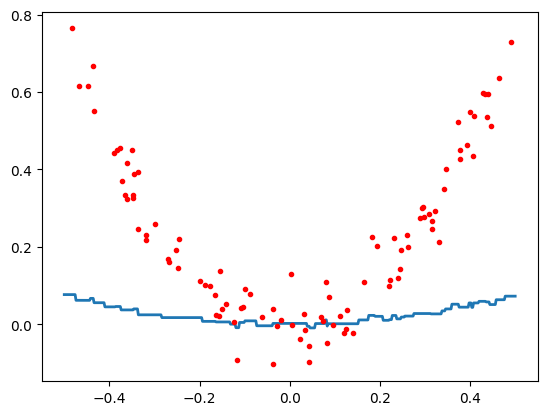

In [101]:
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X, y, number=3, lr=0.1)

Pehla tree ne baseline pattern seekh liya (mean + curve ka base shape).
Dusra tree ne pehle tree ki galti (residual) ko fix kiya. Jab dono ke outputs add hote hain (sum(lr * reg.predict(...))),
toh effectively mean + all corrections add ho jate hain.
👉 Check base case: number == 0 → ❌ (no)→ Continue.
Store original y (for plotting).
👉 Train first tree:
➡️ Tree1 trained on actual y.
➡️ regs = [tree1].➡️ y_pred = 0.1 * tree1.predict(x1)
➡️ Ye first tree ka scaled prediction hai.

👉 Plot

Graph dikhega jisme:
🔵 Blue line = tree1 ka fit
🔴 Red dots = actual data
→ Fit rough hai, perfect nahi (abhi ek hi tree hai).➡️ Compute residuals after tree1:
new y=original y−tree1.predict(X)

Ye residuals batate hain pehla tree kitna galat tha.➡️ Tree2 trained on residuals of tree1
➡️ regs = [tree1, tree2]
➡️ Ab total prediction =
0.1*tree1 + 0.1*tree2
→ Model thoda aur accurate ban gaya.

Blue line ab red points ke aur paas aane lagi (improvement visible).tree3.fit(X, y)
regs = [tree1, tree2, tree3]

👉 Prediction for plotting:
y_pred = 0.1*tree1 + 0.1*tree2 + 0.1*tree3
Now model almost fits perfectly to red points.

Learning rate = “kitni correction apply karni hai”
Maan lo humare actual y = 10
Aur pehle tree ne predict kiya = 8
Residual = 10 - 8 = 2
Ab dusra tree residual (2) ko predict karne ki koshish karega.
Maan lo dusre tree ne residual = 2 predict kar diya (perfectly).

Ab agar hum learning rate = 1 lete:
ypred_new =8+1×2=10
Perfect! 🎯
Lekin real world me har correction perfect nahi hota.
Toh hum chhoti step lena pasand karte hain:
ypred_new	​= 8+0.1×2=8.2
b model dheere-dheere improve karega, jump nahi karega.

5


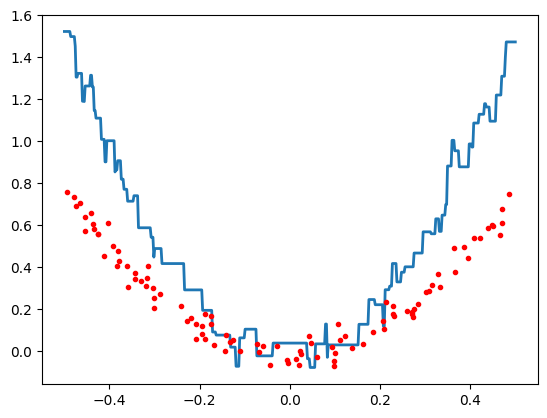

4


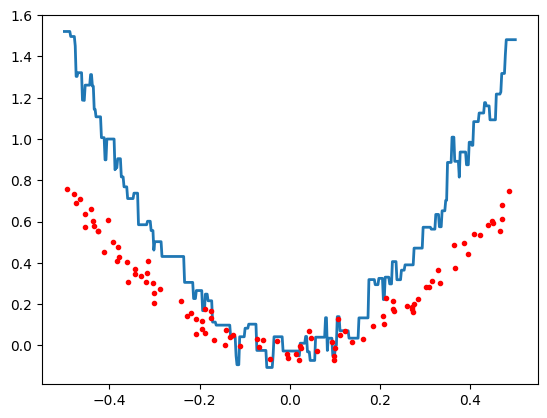

3


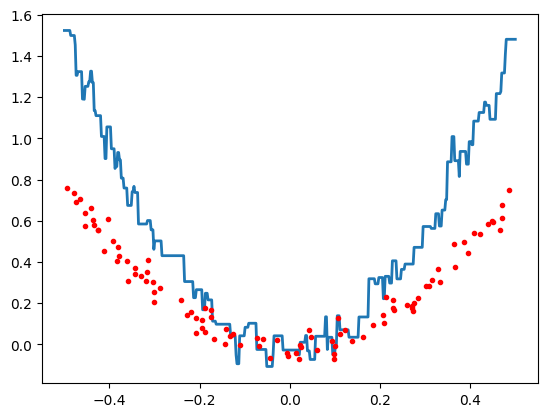

2


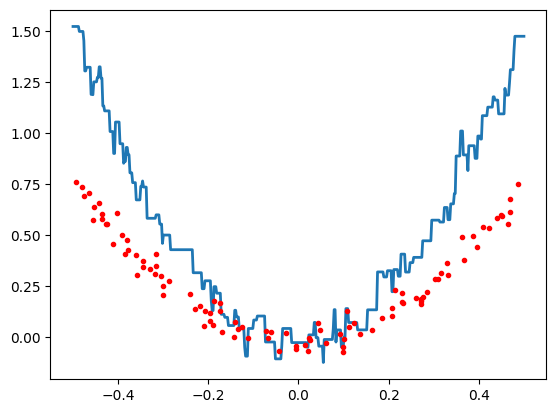

1


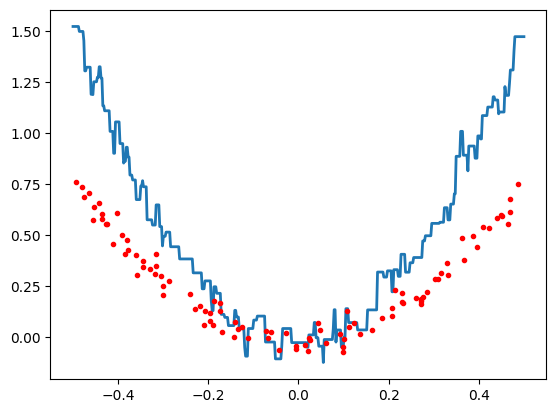

In [106]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)

In [108]:
def gradient_boost_visual(X, y, n_trees=3, lr=0.1, regs=None, iteration=1, initial_y=None):
    # First call setup
    if regs is None:
        regs = []
        initial_y = y.copy()

    # Base condition — jab n_trees khatam ho jaye
    if n_trees == 0:
        # 🔸 Final smooth prediction plot
        x1 = np.linspace(-0.5, 0.5, 500)
        y_final_pred = sum(lr * reg.predict(x1.reshape(-1, 1)) for reg in regs)
        plt.figure(figsize=(8, 4))
        plt.plot(x1, y_final_pred, color='red', linewidth=2, label='Final Model')
        plt.scatter(X[:, 0], initial_y, color='blue', label='Training Data')
        plt.title("🎯 Final Boosted Model (after all trees)")
        plt.legend()
        plt.show()
        return

    # 🔹 Compute residuals if not first iteration
    if iteration > 1:
        residuals = y - regs[-1].predict(X)
    else:
        residuals = y

    # 🔹 Train a new tree on current residuals
    tree = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree.fit(X, residuals)
    regs.append(tree)

    # 🔹 Visualize partial model prediction
    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred_partial = sum(lr * reg.predict(x1.reshape(-1, 1)) for reg in regs)

    plt.figure(figsize=(8, 4))
    plt.plot(x1, y_pred_partial, linewidth=2, label=f'After {iteration} tree(s)')
    plt.scatter(X[:, 0], initial_y, color='red', s=20)
    plt.title(f'Iteration {iteration}: Learning Progress')
    plt.legend()
    plt.show()

    # 🔹 Recursive call for next tree
    gradient_boost_visual(X, residuals, n_trees-1, lr, regs, iteration+1, initial_y)

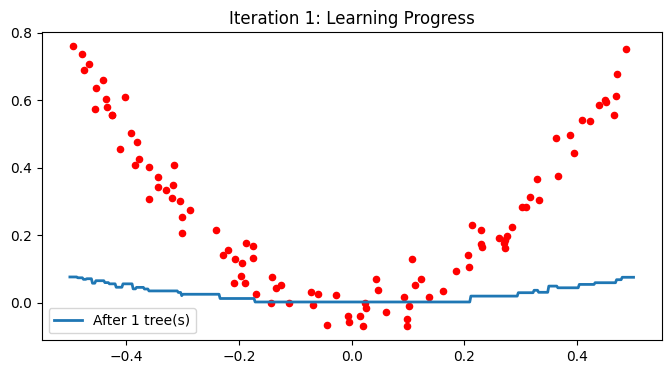

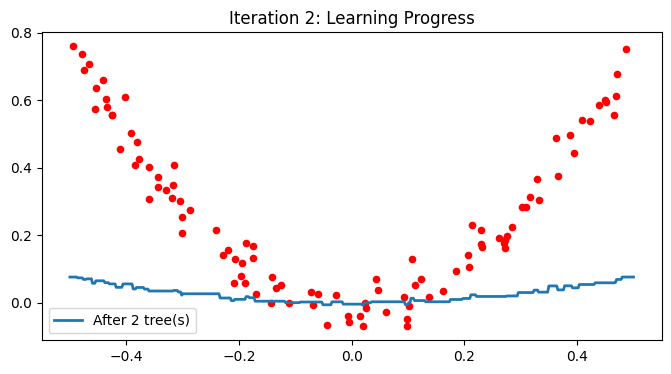

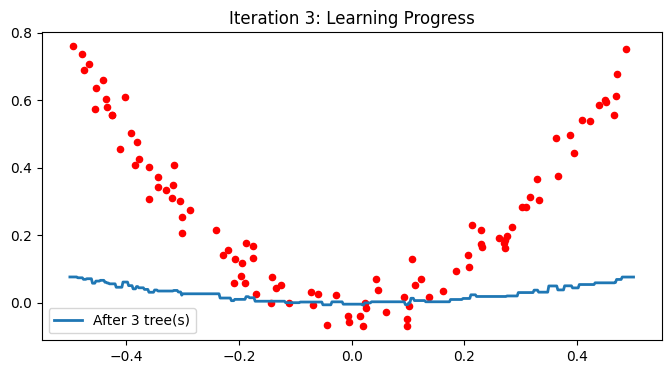

C:\Users\iaman\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


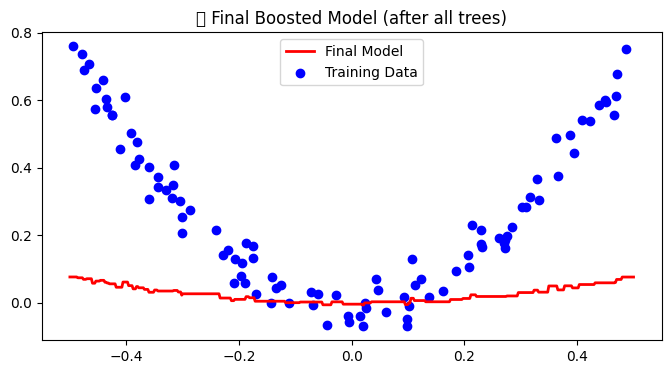

In [110]:
# Random dataset banana (synthetic quadratic curve)
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

# Function call
gradient_boost_visual(X, y, n_trees=3, lr=0.1)
